In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("Data/CLean Data/Overbite Data/Updated_Labels.csv")
df

,Filename,X,Y
0,00OMSZGW_lower_left.png,777,492
1,00OMSZGW_lower_right.png,761,487
2,00OMSZGW_upper_left.png,817,371
3,00OMSZGW_upper_right.png,813,373
4,01328DDN_lower_left.png,815,352
...,...,...,...
1995,I9TWNSD1_upper_right.png,869,367
1996,IAKXN91M_lower_left.png,800,342
1997,IAKXN91M_lower_right.png,816,345
1998,IAKXN91M_upper_left.png,792,283


In [27]:
def overbite_detection(X_upper, Y_upper, X_lower, Y_lower):
  if X_upper - X_lower < 0:
    scalar = -1
  else:
    scalar = 1
  return np.sqrt((X_upper - X_lower)**2 + (Y_upper - Y_lower)**2) * scalar

In [28]:
afstande = np.zeros([1000, 1])
X = df["X"]
Y = df["Y"]

for i in range(0, 1999, 4):
  afstande[i//2] = overbite_detection(X[i+2], Y[i+2], X[i], Y[i])

for i in range(1, 2000, 4):
  afstande[(i - 1)//2 + 1] = overbite_detection(X[i+2], Y[i+2], X[i], Y[i])

afstande

array([[  127.44018205],
       [  125.29964086],
       [  -57.70615219],
       [  -67.23094526],
       [  -57.00877125],
       [  -35.44009029],
       [  -45.27692569],
       [  -68.41052551],
       [  -44.01136217],
       [  -40.49691346],
       [  -62.76941931],
       [  -71.61005516],
       [ -103.31505215],
       [ -110.67520047],
       [  -74.40430095],
       [   43.38202393],
       [  -70.68238819],
       [  -70.45565982],
       [  -86.60831369],
       [  -86.21484791],
       [  -60.81118318],
       [  -65.29931087],
       [   40.71854614],
       [   37.64306045],
       [  -55.        ],
       [  -42.05948169],
       [  -97.57561171],
       [ -149.21461054],
       [  -61.68468205],
       [  -68.44705983],
       [ -125.71793826],
       [ -125.53883861],
       [  -69.42621983],
       [  -76.94153625],
       [  -59.8414572 ],
       [   58.24946352],
       [  -94.06912352],
       [  -92.19544457],
       [-1576.64231835],
       [  -67.2086304 ],


In [29]:
import matplotlib.pyplot as plt

In [35]:
afstande = np.array(sorted(afstande)[1:])
len(afstande)
type(afstande)

numpy.ndarray

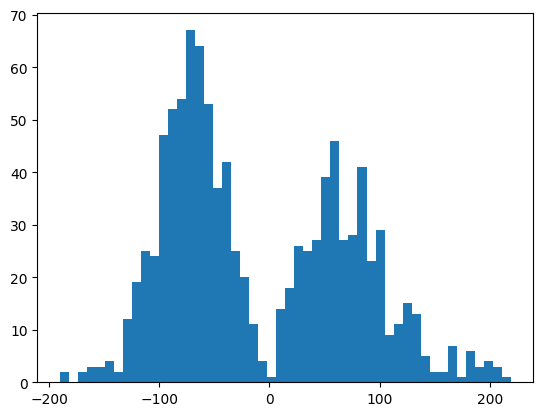

In [36]:
plt.figure()
plt.hist(afstande, bins=50)
plt.show()

In [37]:
np.percentile(afstande, [2.5, 97.5])

array([-125.86092657,  158.86990604])

In [33]:
import scipy.stats as stats
import statsmodels.api as sm

True

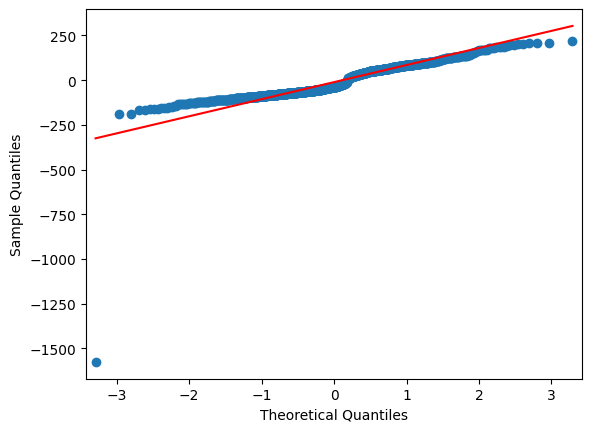

In [34]:
sm.qqplot(afstande, a=0.5, line="s")
2==2

In [38]:
neg_afstande = afstande[afstande < 0]
pos_afstande = afstande[afstande >= 0]

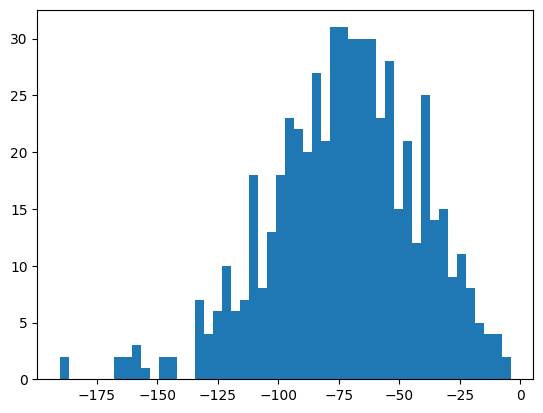

In [39]:
plt.figure()
plt.hist(neg_afstande, bins=50)
plt.show()

True

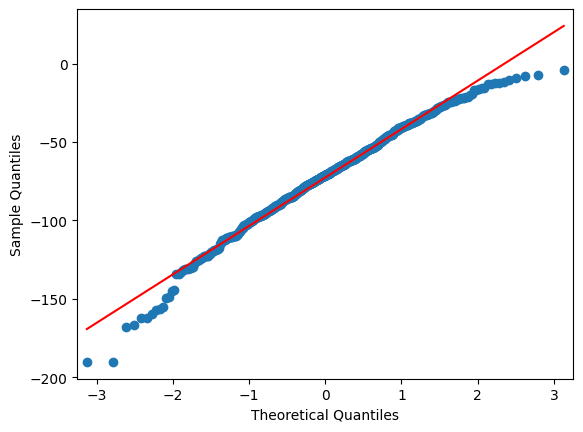

In [40]:
sm.qqplot(neg_afstande, a=0.5, line="s")
2==2

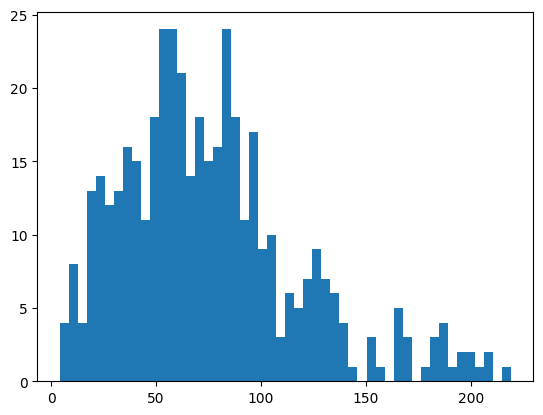

In [41]:
plt.figure()
plt.hist(pos_afstande, bins=50)
plt.show()

True

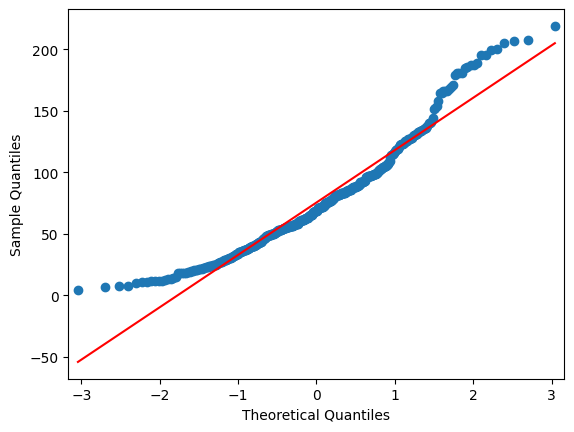

In [42]:
sm.qqplot(pos_afstande, a=0.5, line="s")
2==2